# Caso Propuesto EDA A&A Ltda

**Jose Julian Barrera Machado**

A continuación se realizara todo el proceso de limpieza de los datos, se buscaran variables relevantes, y se respondera a las siguientes preguntas:

¿Cual es el valor promedio mas alto de un inmueble? <br>
¿Cual es el inmueble mas comun?<br>
¿Cuales ciudades tiene mas inmuebles a la venta?<br>
¿Cuales son las variables que me afectan del precio mas directamente?

# Importe de Librerias Necesarias

Se importa las siguientes librerías necesarias para poder trabajar con los datos.

In [2]:
import pandas as pd #procesamiento de datos - dataframe
import numpy as np #trabajar con arrays
import seaborn as sns #visualización
import matplotlib.pyplot as plt #visualización de graficas 


# Lectura de datos

Se importa el archivo en formato “csv” o delimitado por comas, teniendo en cuenta que se encuentre en la misma carpeta de la data, con el siguiente código que creara una variable llamada ‘’’df’’ donde se almacenara todo el set de datos:


In [3]:
df = pd.read_csv("Data_Caso_Propuesto.csv", sep=",")

## Identificacion de los datos 

Generamos el comando mostrado a continuación, donde nos mostrara información general del dataset, entre ellas el tipo de variables y el conteo de los valores no nulos. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


como podemos observar el dataset cuenta con un total de 12 columnas y 463 registros.

### Columnas numericas 

Area Terreno 

Area Construida

Precio

### Columnas categoricas
 
Ciudad                  
Departamento           
Barrio                   
Direccion               
Detalle Disponibilidad   
Estrato                 
Tipo de Inmueble        
Datos Adicionales 


## Identificacion de valores nulos de cada columna

In [5]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

Se puede observar que las variables "Barrio" y "Datos Adicionales" en su gran mayoria cuentan con valores nulos, por lo cual se procede a eliminar dichas columnas directamente.

**Eliminación de valores nulos**

In [6]:
df=df.drop(["Barrio"], axis=1)
df=df.drop(["Datos Adicionales"], axis=1)

## Identificacion de valores duplicados
Se genero una nueva variable llamada ‘’dup’’ que almacenara la cantidad de valores duplicados, en este caso no encontró ninguno.  

In [7]:
dup = df.duplicated().sum() #Análisis de valores duplicados
print(" La base de datos tiene "+ str(dup) +" valores duplicados.")

 La base de datos tiene 0 valores duplicados.


## Conteo de valores Cero

Para esta parte se hizo una suma de todos los valores cero por medio de un condicional, también se utilizo una gráfica de barras

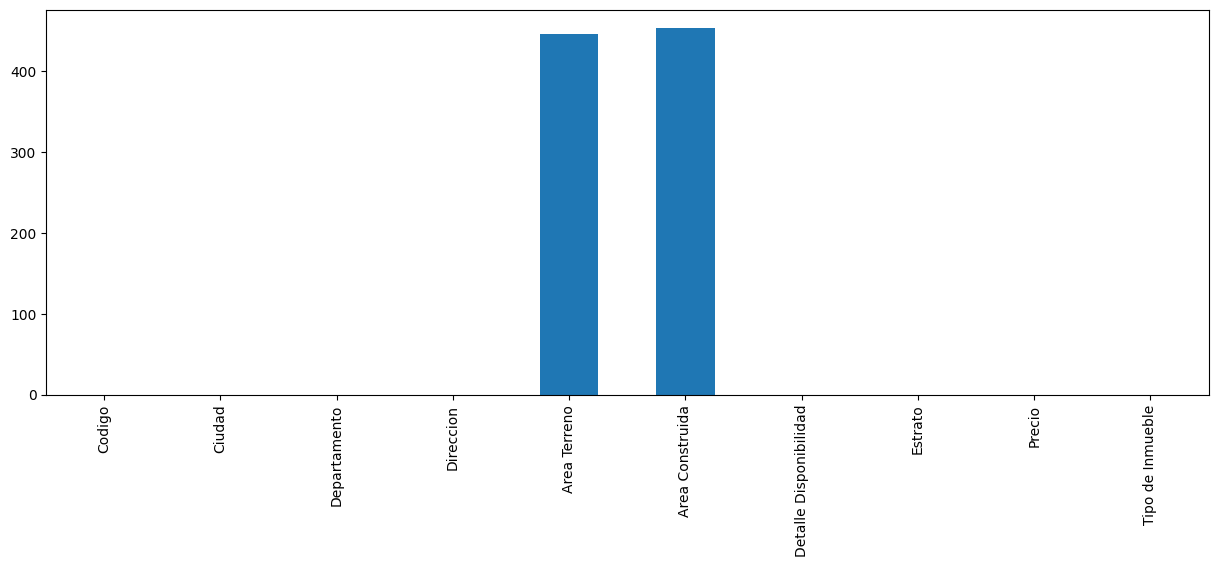

Codigo                      0
Ciudad                      0
Departamento                0
Direccion                   0
Area Terreno              445
Area Construida           453
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
dtype: int64


In [8]:
Cero_Cont = (df==0).sum()
Cero_Cont.plot(kind= "bar", figsize=(15, 5))
plt.show()
print(Cero_Cont)

Se puede observar que las variables "Area Terreno" y "Area Construida" en su gran mayoria tienen valores en cero, por lo cual se procede a eliminarlas.

**Eliminación de valores en cero**

In [9]:
df=df.drop(["Area Terreno"], axis=1)
df=df.drop(["Area Construida"], axis=1)

### Inspección de los posibles outliers

En el siguiente grafico se muestra como se ven datos que se encuentras bastante alejados de donde se estan agrupando los demas, eso quiere decir que pueden ser valores aislados aunque no se puede afirmar sin una inspeccion mas tecnica

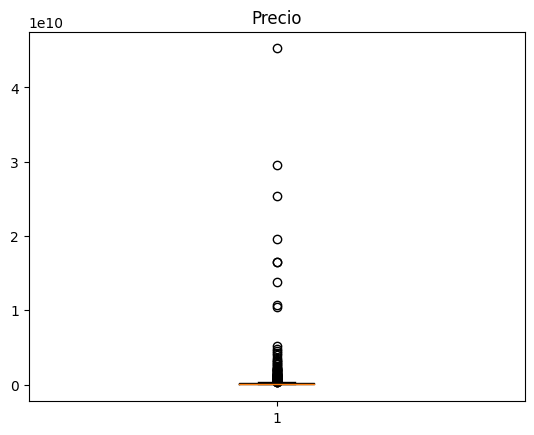

In [10]:
plt.boxplot(df['Precio'])
plt.title("Precio")
plt.show()

#### El dataset queda de la siguiente manera

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Detalle Disponibilidad  463 non-null    object 
 5   Estrato                 463 non-null    object 
 6   Precio                  463 non-null    float64
 7   Tipo de Inmueble        463 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 29.1+ KB


# Entendimiento de los datos

### Tipo de inmuebles mas comunes (top 10)
Se genera un grafico de barras con el top de los tipos de inmuebles más comunes, para para tener en cuenta cual es el que mas se tiene. 

LOCAL                    305
LOTE VIVIENDA             48
BODEGA                    23
OFICINA                   17
CASA                      17
LOTE CON CONSTRUCCION     15
FINCA                     10
APARTAMENTO                7
EDIFICIO                   4
LOTE MIXTO                 3
Name: Tipo de Inmueble, dtype: int64

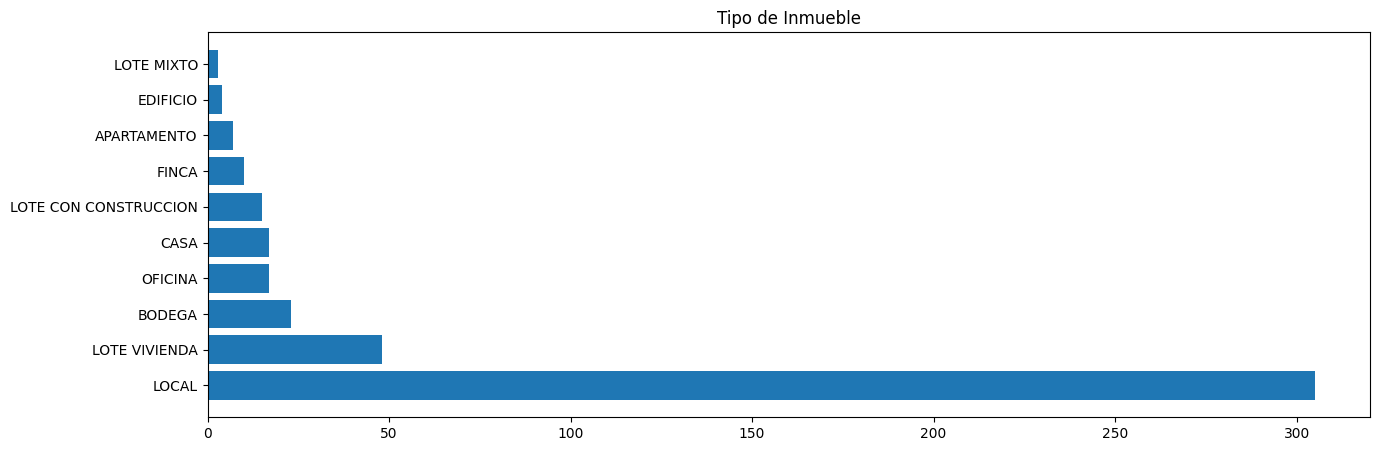

In [12]:
ti=df['Tipo de Inmueble'].value_counts()
### subplots ti
y=ti.values[0:10]
x=ti.index[0:10]
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(x, y)

ax.set_title('Tipo de Inmueble')  
ti[0:10] 

### Promedio de  Precio Segun el tipo de inmueble
Se genera otra grafica para ver cual tipo de inmueble tiene en promedio el mejor precio.

Tipo de Inmueble
APARTAMENTO          5.812427e+08
BODEGA               2.251648e+09
CASA                 7.952695e+08
CLINICA              8.850014e+09
DEPOSITO             7.152000e+06
EDIFICIO             8.798400e+09
EDIFICIO OFICINAS    1.935725e+09
FINCA                2.561625e+09
GARAJE               2.908356e+07
HOTEL                1.040734e+10
Name: Precio, dtype: float64

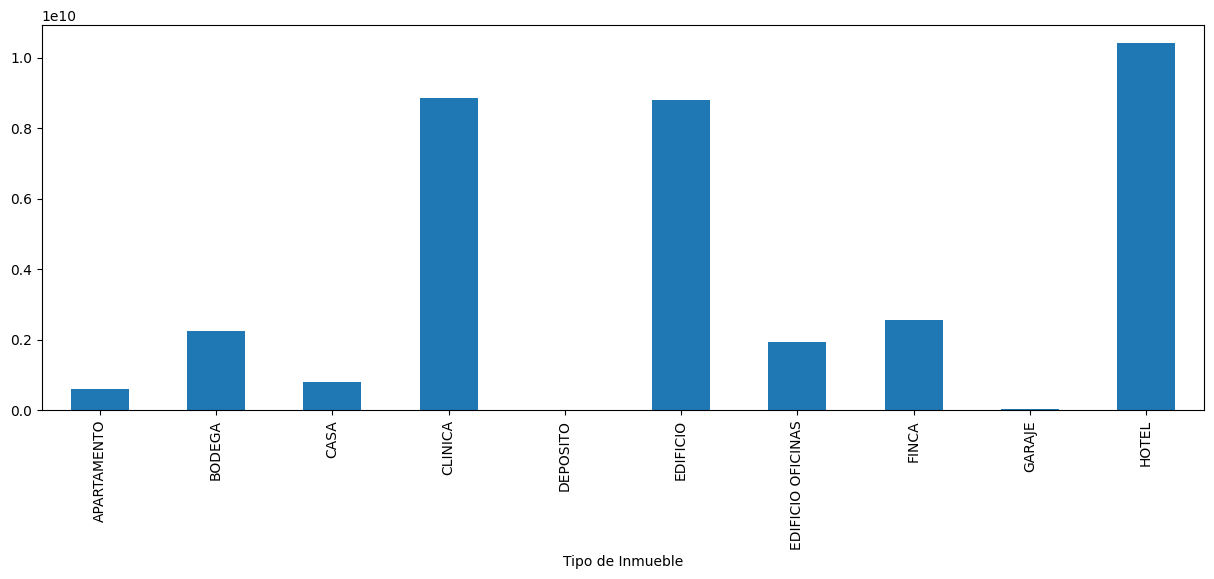

In [13]:

total_InmuebleP = df['Precio'].groupby(df['Tipo de Inmueble']).mean()
total_InmuebleP[0:10].plot(kind= "bar", figsize=(15, 5))
total_InmuebleP[0:10]

### Valor promedio segun el estrato

Estrato
CINCO         1.278927e+09
COMERCIAL     2.555727e+08
CUATRO        1.082890e+09
DOS           3.364024e+08
INDUSTRIAL    2.646415e+09
RURAL         2.450882e+09
SEIS          4.014502e+08
TRES          2.335573e+09
UNO           4.438472e+07
Name: Precio, dtype: float64

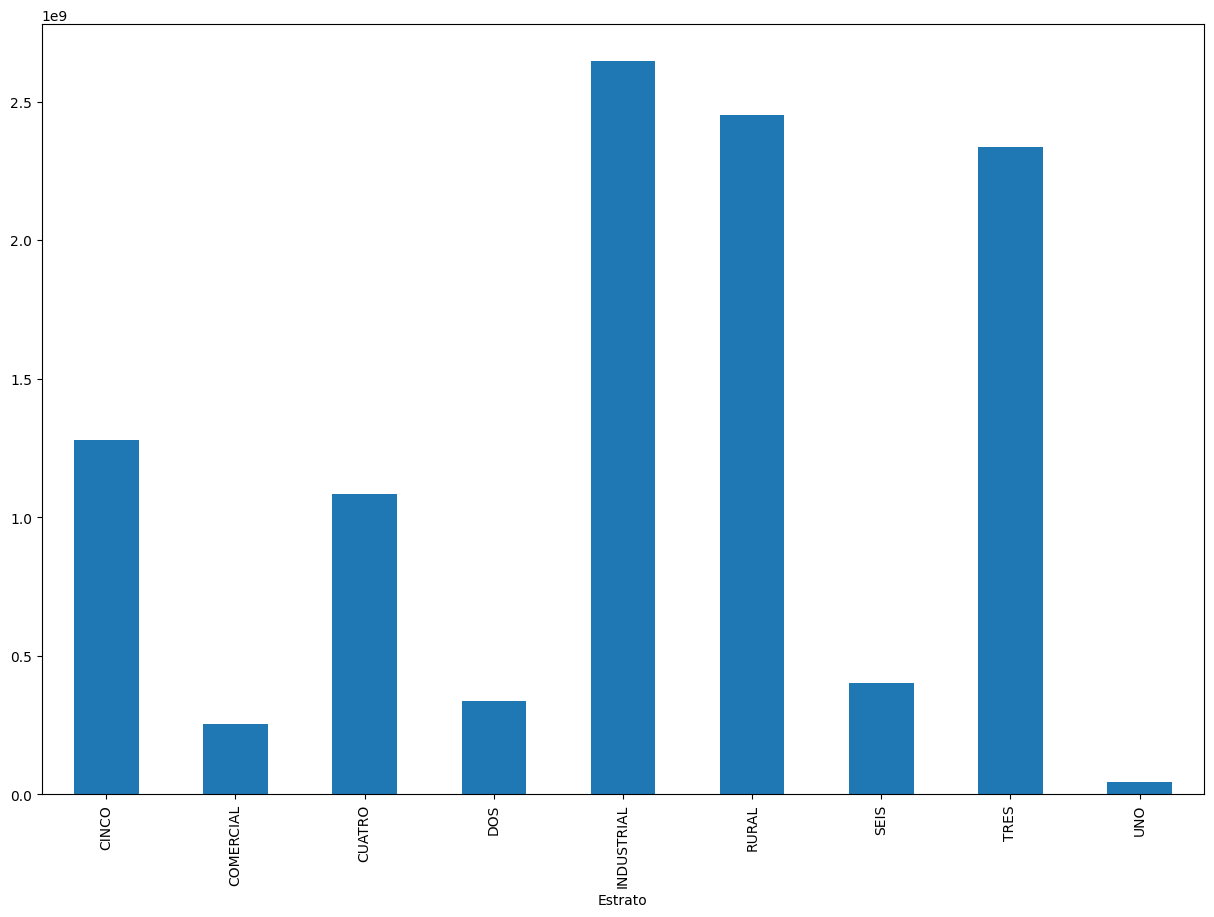

In [14]:
total_Precio_Estrato = df['Precio'].groupby(df['Estrato']).mean()
total_Precio_Estrato.plot(kind= "bar", figsize=(15, 10))
total_Precio_Estrato

### Ciudades con mas tipos de inmuebles

Se muestra el top 10 de ciudades con más tipos de inmuebles 

VILLAVICENCIO       290
BOGOTA               23
CARTAGENA            18
BARRANQUILLA         17
PACORA               16
PEREIRA              14
CALI                 10
CALIMA EL DARIEN     10
TARAZA               10
MEDELLIN              6
Name: Ciudad, dtype: int64

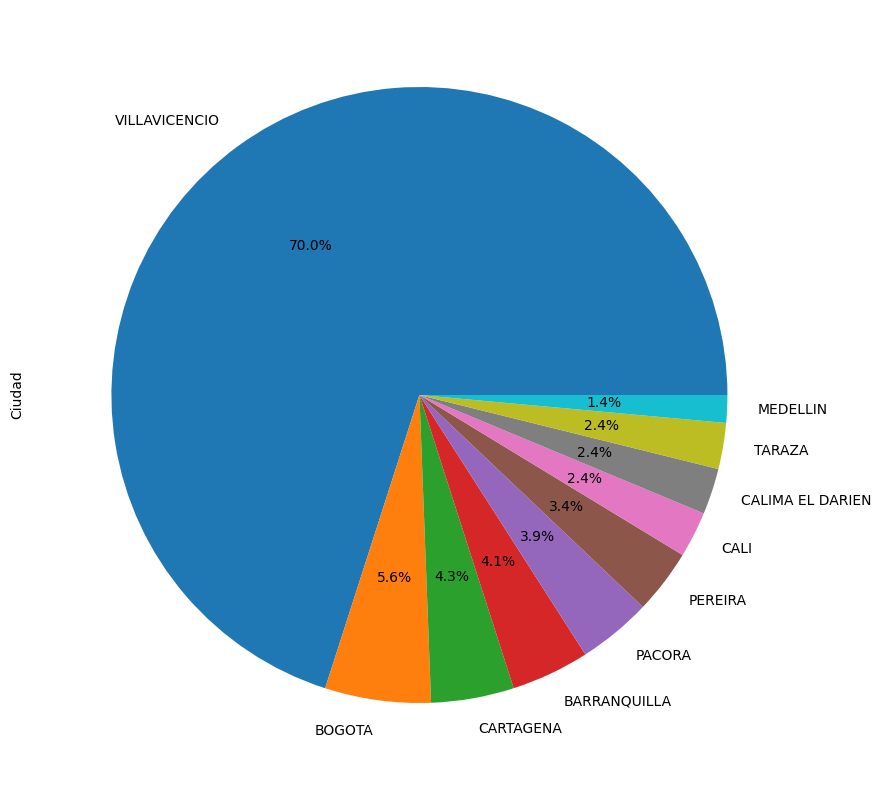

In [15]:

ciudad_Ti_vender = df['Ciudad'].value_counts()
ciudad_Ti_vender[0:10].plot(kind= "pie", figsize=(15, 10),autopct='%.1f%%')
ciudad_Ti_vender[0:10]

## Creacion de nuevas variables nuevas usando One-Hot Encoding

In [16]:
dfN=df
tipoInmueble=pd.get_dummies(dfN["Tipo de Inmueble"])
dfN = pd.concat([dfN, tipoInmueble], axis=1) 

detalleDisponibilidad=pd.get_dummies(dfN["Detalle Disponibilidad"])
dfN = pd.concat([dfN, detalleDisponibilidad], axis=1) 

ciudad=pd.get_dummies(dfN["Ciudad"])
dfN = pd.concat([dfN, ciudad], axis=1) 

depto=pd.get_dummies(dfN["Departamento"])
dfN = pd.concat([dfN, depto], axis=1) 

estrato=pd.get_dummies(dfN["Estrato"])
dfN = pd.concat([dfN, estrato], axis=1) 


### Quedando de la siguiente manera

In [17]:
dfN.head()

,Codigo,Ciudad,Departamento,Direccion,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,APARTAMENTO,BODEGA,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
0,17180,BOGOTA,CUNDINAMARCA,AV CR 7 NO. 166 - 51 LT B,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,0,0,...,0,0,0,0,0,0,0,0,1,0
1,19292,BOGOTA,CUNDINAMARCA,CL 72 No. 12 - 77,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,0,0,...,0,0,1,0,0,0,0,0,0,0
2,19292,BOGOTA,CUNDINAMARCA,CL 72 No. 12 - 77,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2575,SOGAMOSO,BOYACÁ,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,0,0,...,0,0,0,1,0,0,0,0,0,0
4,11409,BUGA,VALLE DEL CAUCA,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,0,0,...,1,0,0,0,0,0,1,0,0,0


### Eliminacion de variables categoricas 

In [18]:
dfN=dfN.iloc[:, 6:118]
dfN=dfN.drop(["Tipo de Inmueble"], axis=1) 
dfN.head()

,Precio,APARTAMENTO,BODEGA,CASA,CLINICA,DEPOSITO,EDIFICIO,EDIFICIO OFICINAS,FINCA,GARAJE,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
0,2.958081e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.646059e+10,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.646059e+10,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.376828e+10,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4.523379e+10,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Análisis Univariado.

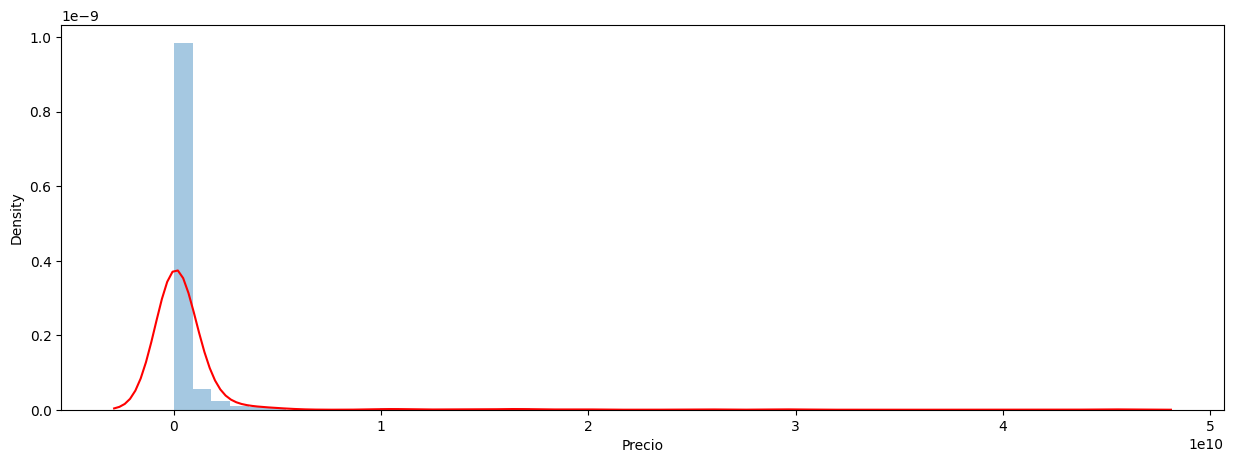

count    4.630000e+02
mean     6.672032e+08
std      3.272992e+09
min      4.650000e+06
25%      1.230500e+07
50%      1.587000e+07
75%      1.379955e+08
max      4.523379e+10
Name: Precio, dtype: float64


In [19]:
tag1= "Precio"
plt.figure(figsize=(15, 5))
sns.distplot(df[tag1], kde_kws= {"color":"r"})
plt.show()
print(df[tag1].describe())

## Análisis Multivariabo 

Podemos observar el nivel de relacion de las variables, aunque para verlo en su totalidad es necesario cambiar el rango de las variables que se pueden mostrar desde la funcion 'iloc' 

<AxesSubplot: >

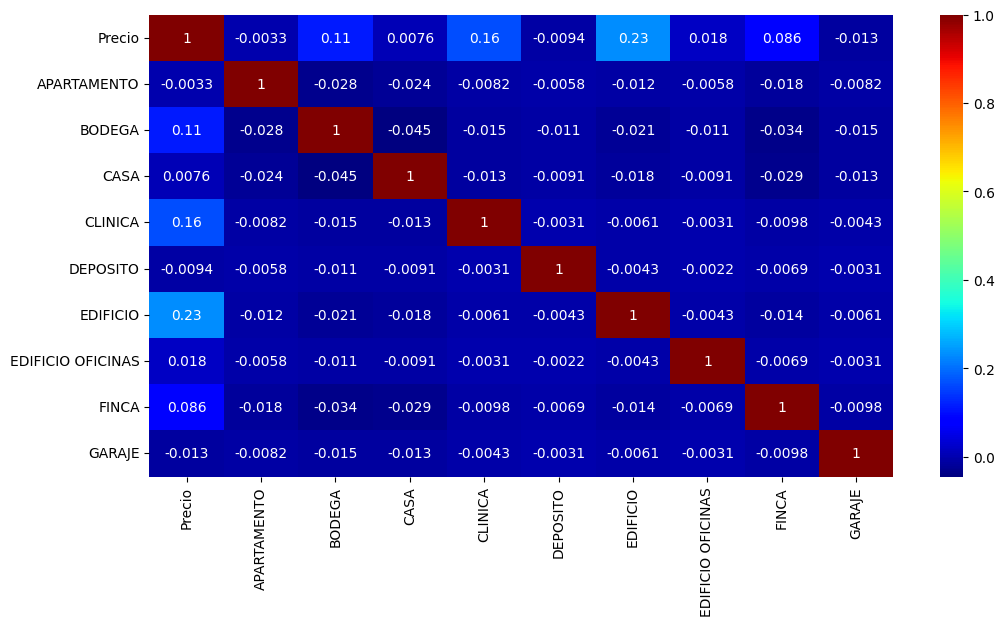

In [36]:

#Ejecución de la matriz de correlación y una heatmap
plt.figure(figsize=(12,6))
cor = dfN.iloc[:, 0:10].corr()
sns.heatmap(cor,cmap="jet",annot=True) 


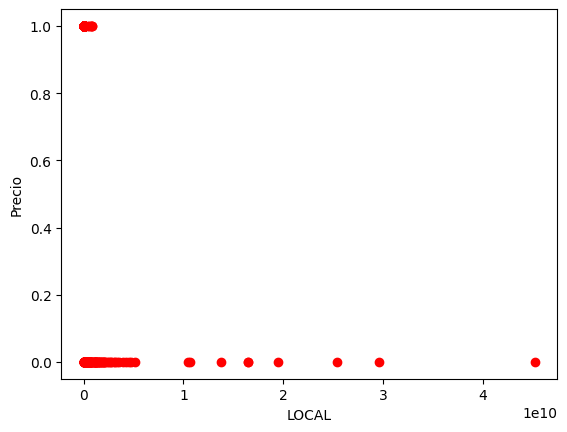

In [37]:
plt.plot(dfN['Precio'], dfN['LOCAL'], "ro")
plt.ylabel("Precio")
plt.xlabel("LOCAL") 
plt.show() 

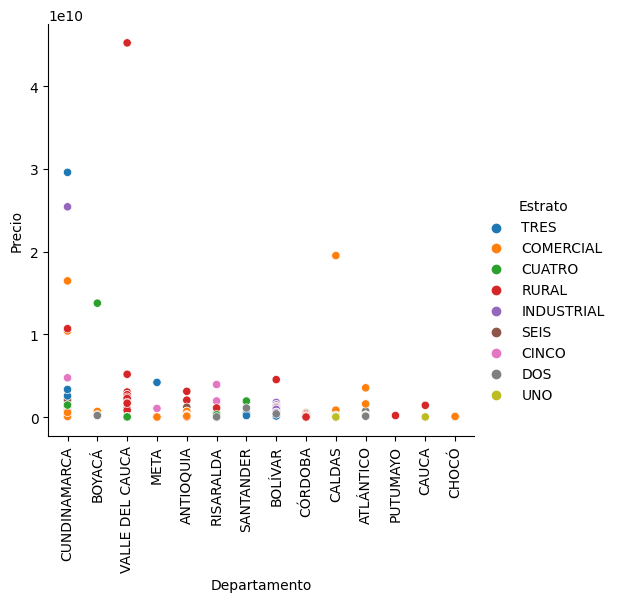

In [46]:
sns.relplot(x="Departamento", y="Precio",hue='Estrato', data=df)
plt.xticks(rotation=90)
plt.show()

# Concluciones 

Se eliminaron variables que no aportaban nada y se generaron nuevas usando one hot encodig, aunque considero que el volumen del los datos es muy poco para un proximo entrenamiento y encontrar variables que afecten el precio con metodos mas robustos de Machine Learning.